In [1]:
# import lib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# load and preprocess CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
# define model builder
def build_bn_model(use_batchnorm=False):
    model = keras.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))

    model.add(layers.Conv2D(32, (3, 3), activation=None))
    if use_batchnorm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation=None))
    if use_batchnorm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation=None))
    if use_batchnorm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [4]:
# train without batch normalization
no_bn_model = build_bn_model(use_batchnorm=False)
history_no_bn = no_bn_model.fit(x_train, y_train,
                                validation_split=0.2,
                                epochs=15, batch_size=64, verbose=0)

In [5]:
# train with batch normalization
with_bn_model = build_bn_model(use_batchnorm=True)
history_with_bn = with_bn_model.fit(x_train, y_train,
                                    validation_split=0.2,
                                    epochs=15, batch_size=64, verbose=0)

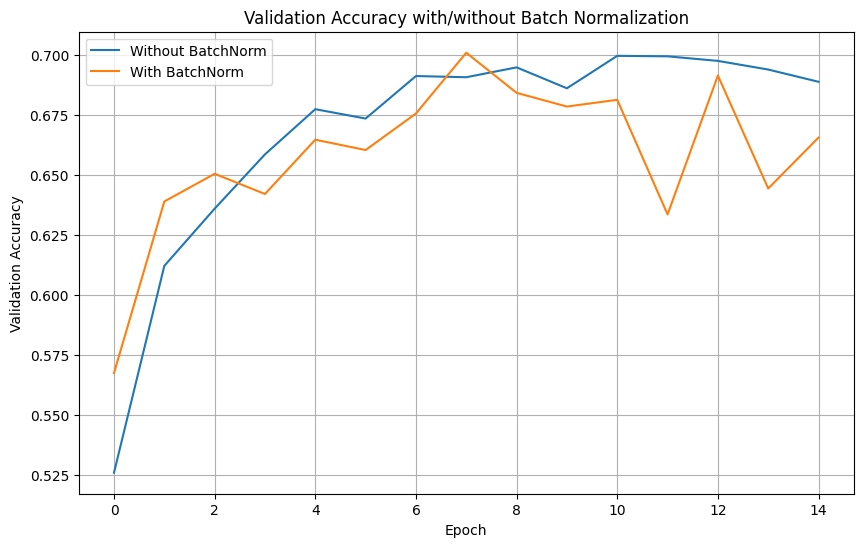

In [6]:
# plot validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_no_bn.history['val_accuracy'], label='Without BatchNorm')
plt.plot(history_with_bn.history['val_accuracy'], label='With BatchNorm')
plt.title('Validation Accuracy with/without Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# evaluate both models
test_loss_no_bn, test_acc_no_bn = no_bn_model.evaluate(x_test, y_test, verbose=0)
test_loss_bn, test_acc_bn = with_bn_model.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy - No BatchNorm: {test_acc_no_bn:.4f}")
print(f"Test Accuracy - With BatchNorm: {test_acc_bn:.4f}")

Test Accuracy - No BatchNorm: 0.6836
Test Accuracy - With BatchNorm: 0.6623
